In [2]:
import numpy as np  #numpy 행렬이나 , 대규모의 다차원배열 쉽게 처리해주는 라이브러리
import pandas as pd #pandas 데이터 조작 및 분석을 위해 python 프로그래밍언어로 작성된 소프트웨어 라이브러리
import matplotlib.pyplot as plt #matplotlib 파이썬에서 그래프 표시를 가능하게 해주는 라이브러리
import seaborn as sns #확률밀도함수는 값들이 어떻게 분포되어 있는가를 보여주는 시각화자료
from sklearn.neighbors  import KNeighborsClassifier
%matplotlib inline 

In C:\Program Files\tools\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Program Files\tools\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Program Files\tools\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Program Files\tools\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Program Files\tools\Anaconda3\lib\site-packages\matplo

In [30]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

#  분석할 데이터 로드

In [3]:
wine_data = pd.read_csv('../data2/wine.csv', encoding="utf-8")

In [4]:
wine_data.info() # 데이터 개괄

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
class                   1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


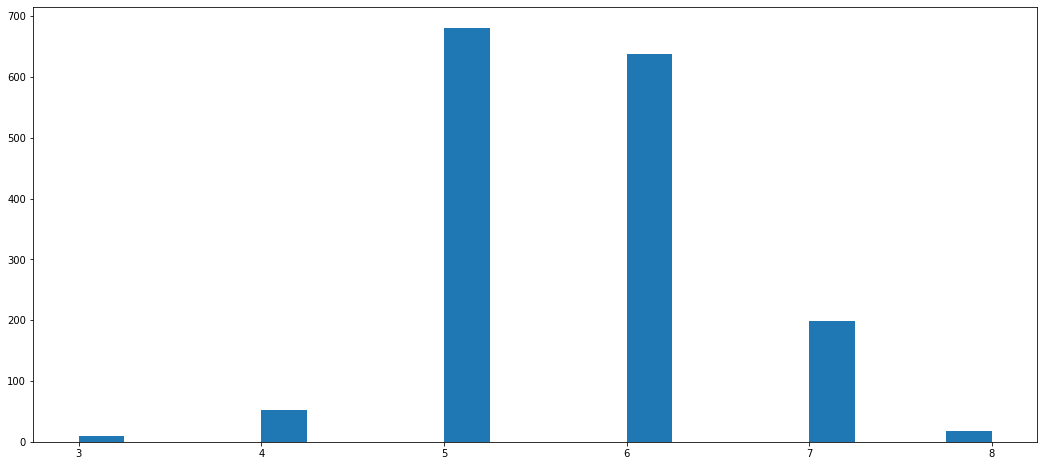

In [6]:
wine_data['quality'].hist(bins=20,figsize=(18,8),grid=False);

In [7]:
wine_data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
quality,,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,0
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094,0
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706,0
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,1
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913,1
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,1


# quality를 그룹으로 지정 후 각 항목의 평균값

In [8]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


# 각 항목 간의 상관도

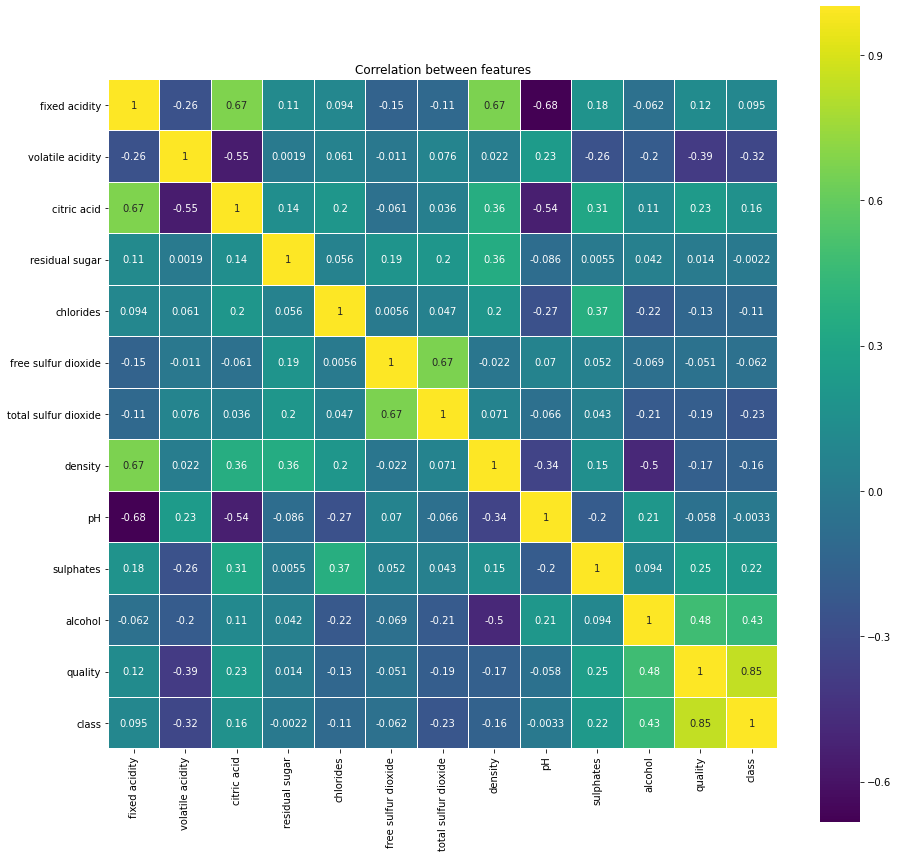

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(wine_data.corr(), linewidths=0.01, square=True,
           annot=True, cmap=plt.cm.viridis,linecolor="white")

plt.title('Correlation between features')
plt.show()

# 상관관계를 히트맵을 그리기 ▲

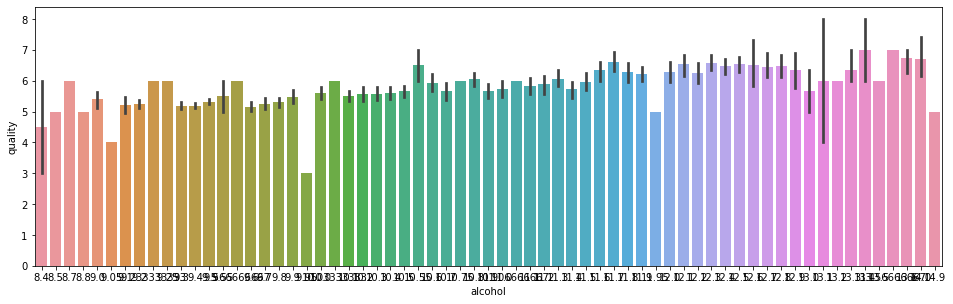

In [10]:
plt.figure(figsize=[14,4])

plt.subplot(111) # 인덱스 1번 그래프
sns.barplot('alcohol', 'quality', data=wine_data)


plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)

plt.show()

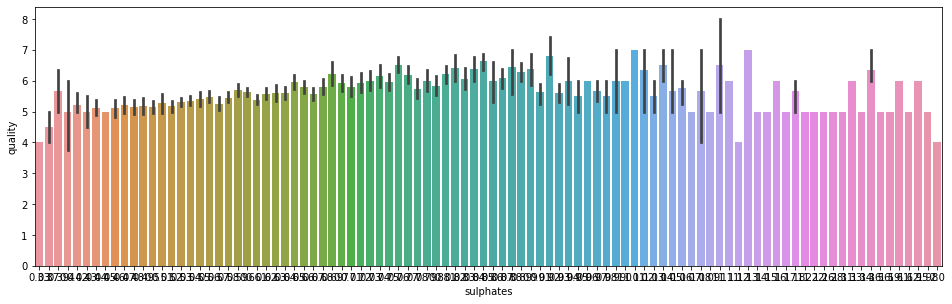

In [21]:
plt.figure(figsize=[14,4])

plt.subplot(111) # 인덱스 1번 그래프
sns.barplot('sulphates', 'quality', data=wine_data)


plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)

plt.show()

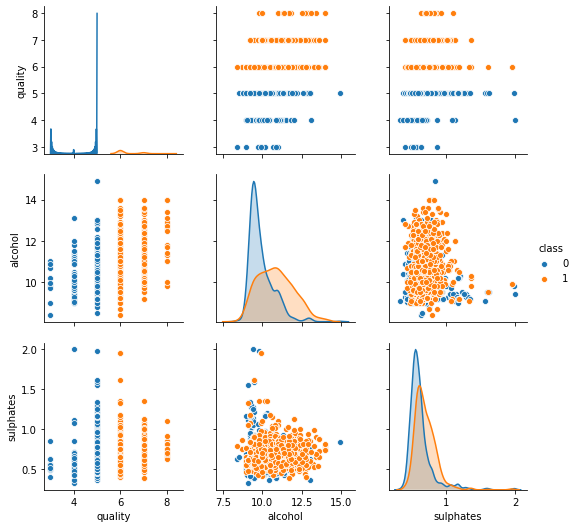

In [22]:
sns.pairplot(wine_data, hue='class', vars=['quality','alcohol','sulphates'],
            )

## barplot은 평균을 가지고 그리는 함수  ▲

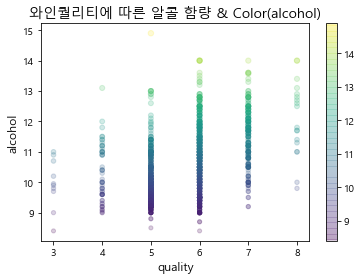

In [32]:
plt.scatter(wine_data.quality, # x

           wine_data.alcohol, # y

           alpha=0.2, 

           s=2*wine_data.alcohol, # marker size

           c=wine_data.alcohol, # marker color

           cmap='viridis'
           )

plt.title('와인퀄리티에 따른 알콜 함량 & Color(alcohol)', fontsize=14)

plt.xlabel('quality', fontsize=12)

plt.ylabel('alcohol', fontsize=12)

plt.colorbar()

plt.show()

# 와인의 클래스 구하기

In [26]:
train_pre = wine_data[['class','quality','sulphates','alcohol']]
train_pre.head()

,class,quality,sulphates,alcohol
0,0,3,0.57,9.0
1,0,3,0.63,8.4
2,0,3,0.54,10.7
3,0,3,0.86,9.9
4,0,3,0.49,11.0


* 필요한 데이터만 추출하여 다시 프레임 생성

## 와인의 클래스를 나누는 영향은 퀄리티가 가장 영향이 있고 , 그 퀄리티에 영향을 주는 건 알콜함량과 황산염의 농도이다

In [55]:
train_pre = train_pre[train_pre['class'].notnull()]
train_pre = train_pre[train_pre['quality'].notnull()]
train_pre= train_pre[train_pre['sulphates'].notnull()]
train_pre = train_pre[train_pre['alcohol'].notnull()]
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 4 columns):
class        1599 non-null float64
quality      1599 non-null float64
sulphates    1599 non-null float64
alcohol      1599 non-null float64
dtypes: float64(4)
memory usage: 62.5 KB


* NaN값 제거

In [56]:
train_pre['class'] = train_pre['class'].astype('float')
train_pre['quality'] = train_pre['quality'].astype('float')
train_pre['sulphates'] = train_pre['sulphates'].astype('float')
train_pre['alcohol'] = train_pre['alcohol'].astype('float')
train_pre.head()

,class,quality,sulphates,alcohol
0,0.0,3.0,0.57,9.0
1,0.0,3.0,0.63,8.4
2,0.0,3.0,0.54,10.7
3,0.0,3.0,0.86,9.9
4,0.0,3.0,0.49,11.0


In [57]:
train_pre2 = train_pre[['quality','sulphates','alcohol']] 
train_pre2.head()

,quality,sulphates,alcohol
0,3.0,0.57,9.0
1,3.0,0.63,8.4
2,3.0,0.54,10.7
3,3.0,0.86,9.9
4,3.0,0.49,11.0


In [58]:
train_pre2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 3 columns):
quality      1599 non-null float64
sulphates    1599 non-null float64
alcohol      1599 non-null float64
dtypes: float64(3)
memory usage: 50.0 KB


# 문제지 항목을 따로 데이터 프레임에 넣음  ▲

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_pre2, 
                                                    train_pre[['class']], 
                                                    test_size=0.1,  
                                                    random_state=13) # 9:1 트레인 데이터 : 9

In [60]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(x_train, y_train) #y_train 정답

print('Score: {}'.format(tree_clf.score(x_train, y_train))) # 트레인한 데이터와 기존의 정답 데이터를 비교한다

Score: 1.0


## 머신러닝에 선행학습. 위의 사례를 훈련시킴.

# 문제와 답을 보고서 스스로 판단할 수 있는 영점을 맞춰가는 과정 ▲

In [61]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(x_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Test Accuracy is  100.0


##  머신러닝이 선행학습 후  도출한 정답률과 , 실제 정답이 일치 할 퍼센트 ▲

# KNN을 이용한 훈련/ 검증 knn은 최근접 이웃 알고리즘이다 ▼

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)

In [63]:
knn.fit(x_train,y_train)

C:\Program Files\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
y_pred =knn.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


# 임의 데이터를 넣어 판별하기

In [65]:
#'quality','sulphates','alcohol'
wine1=[8.,8.,1.]

In [66]:
tree_clf.predict_proba([wine1]) # 죽을 확율, 살 확율

array([[0., 1.]])